<a href="https://colab.research.google.com/github/tcglarry/something_new/blob/master/cutout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np


class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        #h = img.size(1)
        #w = img.size(2)
        h = img.shape[1]
        w = img.shape[2]

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.5  #original set to 0., becomes all black

        mask = torch.from_numpy(mask)
        mask = mask.expand_as(img)
        img = img * mask

        return img

<built-in method size of Tensor object at 0x7fd7ed60d1b0>
torch.Size([3, 592, 983])


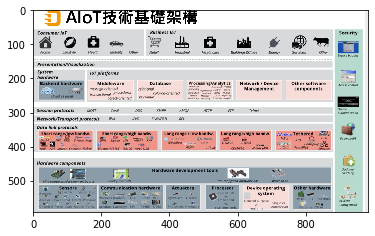

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as TF

image = Image.open('test.png')

import torchvision.transforms.functional as TF


image=image.convert('RGB')
plt.imshow(image)
x = TF.to_tensor(test)
print(x.size)
print(x.shape)

In [0]:
cutout_img = Cutout(1,128)
aft_img = cutout_img(x)

In [49]:
aft_np = aft_img.numpy()
aft_np.shape

(3, 592, 983)

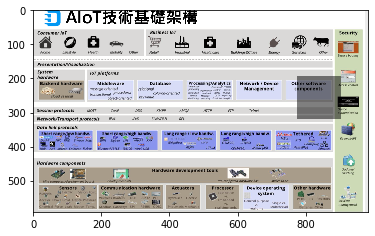

In [50]:
aft_np= np.transpose(aft_np,(1,2,0))
plt.imshow(aft_np)